<a href="https://colab.research.google.com/github/auab/Customer-Analysis/blob/main/customer_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction 


Understand the costumer is very important for any company, from these who creates the product to the ones who creates the advertises. In the customer-centric culture, the data plays a big role in this process of knowing the client and one technique used in this task is the **customer segmentation**.

The idea of this project is to create a customer segmentation using a dataset avaiable in kaggle, describe the steps taken and choices made  and discuss the obtained result.

## Segmentation
<strong><em>Definition</strong>: Segmentation is a process of taxonomy, a way to divide something into parts, a way to divide market into sub-markets</em>

Here we'll use data to define the numbers of segments and how they are divided, but it could also be done by a business rule, like *highest use*, *medium use* and *low use* of a specific product.

### Why segement?
It was said in the beginning that a segmentation is important to understand the customer, but how it can be used? *Grigsby* (2018) lists thre typical uses of segmentation: 
* Finding similar members;
* Making modelling better;
* Using marketing strategy to attack each segment differently.

## The dataset
The dataset used here was extracted from Kaggle and it's available (with data description) in <a href="https://www.kaggle.com/imakash3011/customer-personality-analysis">here</a>. I also made it available the <a href='https://github.com/auab/Customer-Analysis'>github repository</a> of this project

### Dataset description

The database is divided in three types of features: 
* **People**: it contains mainly demographic features
* **Products**: the ammount spent in a specific product category in the last two years
* **Promotion**: the customer response to promotions campaings
* **Places**: the place where the customer buys the product

The deatiled description including the features names is presented below:


**People**

ID: Customer's unique identifier<br />
Year_Birth: Customer's birth year<br />
Education: Customer's education level<br />
Marital_Status: Customer's marital status<br />
Income: Customer's yearly household income<br />
Kidhome: Number of children in customer's household<br />
Teenhome: Number of teenagers in customer's household<br />
Dt_Customer: Date of customer's enrollment with the company<br />
Recency: Number of days since customer's last purchase<br />
Complain: 1 if the customer complained in the last 2 years, 0 otherwise<br /><br />

**Products**

MntWines: Amount spent on wine in last 2 years<br />
MntFruits: Amount spent on fruits in last 2 years<br />
MntMeatProducts: Amount spent on meat in last 2 years<br />
MntFishProducts: Amount spent on fish in last 2 years<br />
MntSweetProducts: Amount spent on sweets in last 2 years<br />
MntGoldProds: Amount spent on gold in last 2 years<br /><br />


**Promotion**


NumDealsPurchases: Number of purchases made with a discount<br />
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise<br />
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise<br />
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise<br />
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise<br />
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise<br />
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise<br /><br />


**Place**


NumWebPurchases: Number of purchases made through the company’s website<br />
NumCatalogPurchases: Number of purchases made using a catalogue<br />
NumStorePurchases: Number of purchases made directly in stores<br />
NumWebVisitsMonth: Number of visits to company’s website in the last month

# Initial Imports

In [2]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
import seaborn as sns
sns.set_theme(style="ticks")
from matplotlib.pyplot import figure
from sklearn.decomposition import PCA
import warnings
from yellowbrick.cluster import silhouette_visualizer
warnings.filterwarnings('ignore')

In [3]:
customer_data = pd.read_csv('https://raw.githubusercontent.com/auab/Customer-Analysis/main/marketing_campaign.csv',sep='\t')
customer_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


# Exploratory Analysis


## Clean the data: NAs and Outliers

The first step is see if there are NA variables and outliers. Depending on how many they are, a differente approach will be used to deal with it.

In [4]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

The analysis show that the **Income** column has NA, values. Since they are not so many, the treatment choosen here is simply drop the rows.

In [5]:
customer_data=customer_data.dropna(subset=['Income'])

A way to observe if there are outlier instances is to plot histograms and analyze how they are depicted. The expected format for a graph without outliers is an historgram with bars very close to each other ocuppying almost all the x-axis intervals presented in the figure (assuming that the x-axis range was set considering the max. and min. value of the feature).

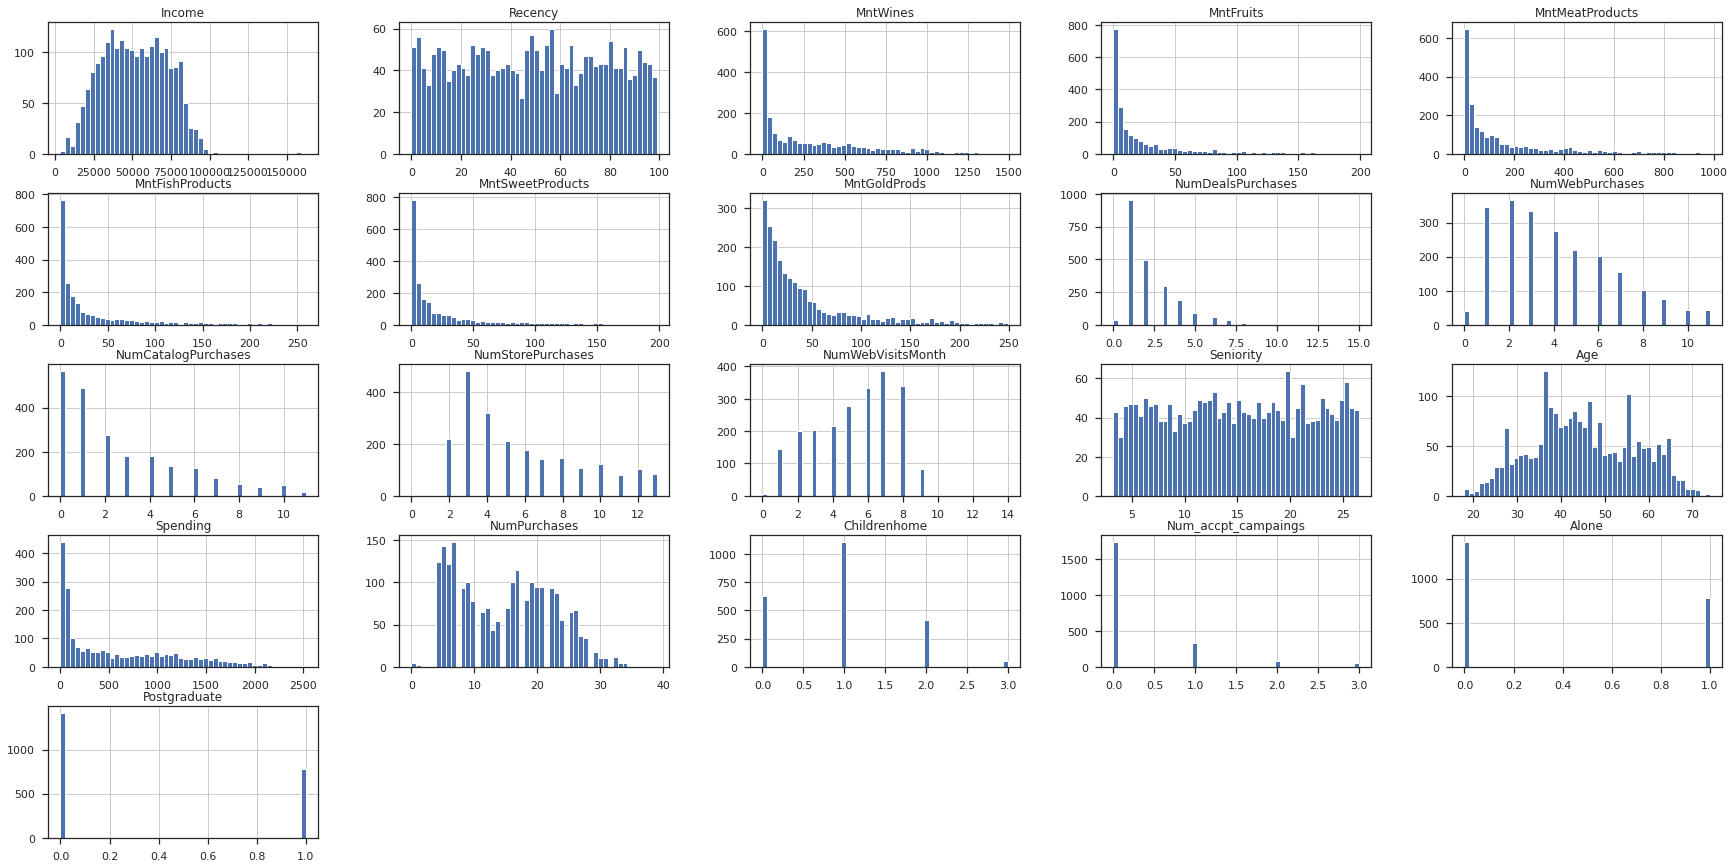

In [44]:
customer_data.hist(bins=50, figsize=(30,15))
plt.show()

Such graphs indicates different treatments for each case. Each feature demands a new graph to understand the situation. Let's start with Year_Birth

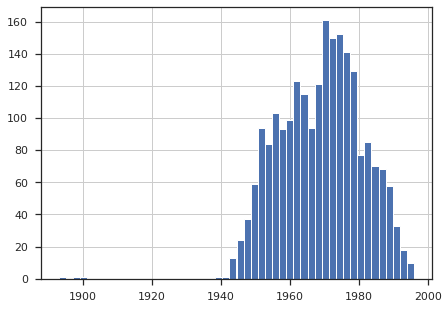

There are 3 abnormal birth years


In [7]:
customer_data['Year_Birth'].hist(bins=50, figsize=(7,5))
plt.show()
abnormal_birth_year = len(customer_data[customer_data['Year_Birth']<1910])
print('There are '+str(abnormal_birth_year)+' abnormal birth years')

Since there are only 3 values, we can drop the instances without great harm.

In [8]:
customer_data = customer_data[customer_data['Year_Birth']>1910]

The next is Income:

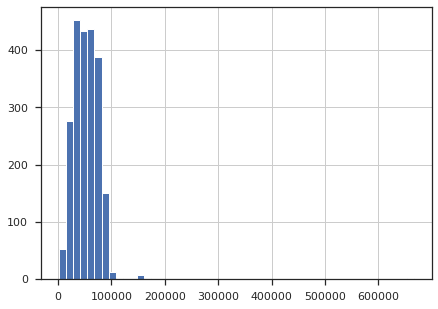

There are 1 abnormal income values


In [9]:
customer_data['Income'].hist(bins=50, figsize=(7,5))
plt.show()
abnormal_income = len(customer_data[customer_data['Income']>600000])
print('There are '+str(abnormal_income)+' abnormal income values')

Only 1 instance. Drop again.

In [10]:
customer_data = customer_data[customer_data['Income']<600000]

Then come the *Products* features, which can be analyzed together:

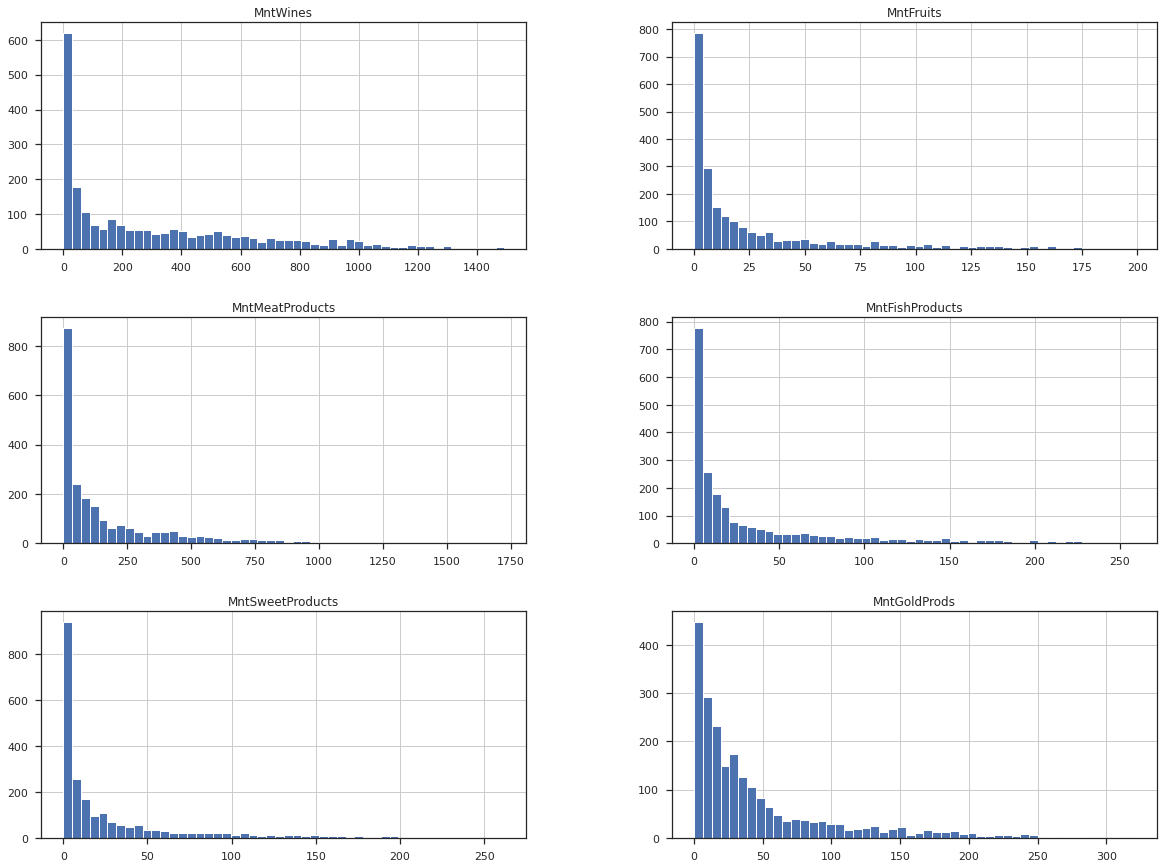

In [11]:
filter_products_col = [col for col in customer_data if col.startswith('Mnt')]
customer_data[filter_products_col].hist(bins=50, figsize=(20,15))
plt.show()

Only meat and sweetproducts present instances far from the others, than these will be removed

In [12]:
customer_data = customer_data[customer_data['MntSweetProducts']<200]
customer_data = customer_data[customer_data['MntMeatProducts']<1000]

The *Purchase* features will be droped following the same idea

In [13]:
customer_data = customer_data[customer_data['NumWebPurchases']<15]
customer_data = customer_data[customer_data['NumCatalogPurchases']<15]
customer_data = customer_data[customer_data['NumWebVisitsMonth']<15]

The features *AcceptedCmp2* and *Complain* are binary variables with low number of '1' values. Depending on how low it is, it is better to drop the whole column.

In [14]:
customer_data['AcceptedCmp2'].value_counts()

0    2169
1      30
Name: AcceptedCmp2, dtype: int64

In [15]:
customer_data['Complain'].value_counts()

0    2179
1      20
Name: Complain, dtype: int64

These values represent less than 2% of the total number of instances, so these columns will be droped, and so will be the Z_CostContact and Z_Revenue, because all the instances have the same value, meaning nothing for the segmentation process

In [16]:
customer_data.drop(['Complain','AcceptedCmp2','Z_CostContact','Z_Revenue'],axis=1,inplace=True)

Here is the final result:

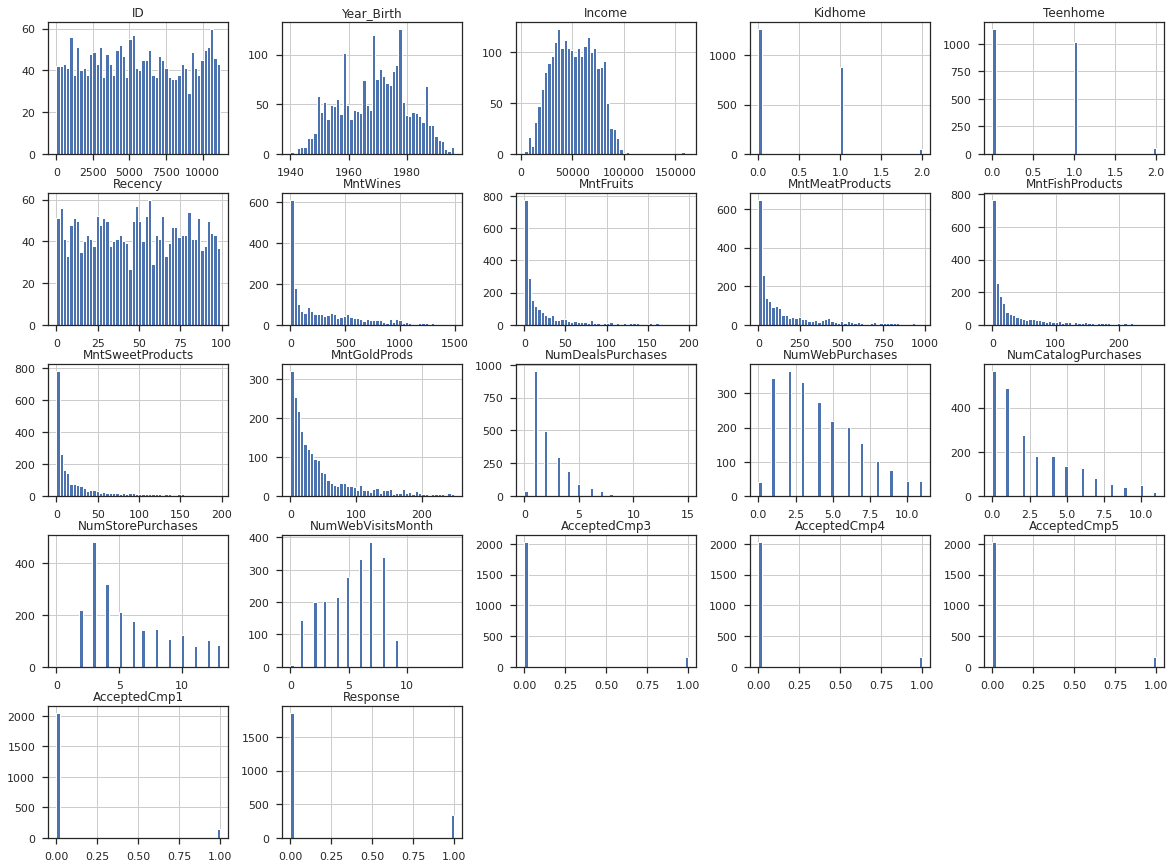

In [17]:
customer_data.hist(bins=50, figsize=(20,15))
plt.show()

## Clean the data: Object Variables

For the moment, it is enough to list the variables and see from which categories they are composed. In next steps, these categories can be simplified.

In [18]:
education_categories = customer_data['Education'].value_counts()
marital_categories = customer_data['Marital_Status'].value_counts()
print(education_categories,'\n\n\n',marital_categories)

Graduation    1110
PhD            473
Master         364
2n Cycle       198
Basic           54
Name: Education, dtype: int64 


 Married     852
Together    568
Single      466
Divorced    230
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


The other *object* column refers to a date type, wchich will further be converted

## Transform the data: Variable creation and modification

Here we'll start with the columns refering to dates, namely *Year_Birth* and *Dt_Customer* being replaced by other meaningful variables (Age and Client_Seniority, respectively). We'll consider the date from data extraction: 04/10/2014. 

In [19]:
last_date = datetime.date(2014,10, 4)
customer_data['Seniority']=pd.to_datetime(customer_data['Dt_Customer'], dayfirst=True,format = '%d-%m-%Y')
customer_data['Seniority'] = pd.to_numeric(customer_data['Seniority'].dt.date.apply(lambda x: (last_date - x)).dt.days, downcast='integer')/30
customer_data['Age']= 2014-customer_data['Year_Birth']

Then we aggregate some column values to create new ones.

In [20]:
#Aggregate the ammount spended
customer_data['Spending'] = customer_data[filter_products_col].sum(axis=1)
#Aggregate the number of purchases
filter_purchases_col = [col for col in customer_data if col.endswith('Purchases')]
customer_data['NumPurchases'] = customer_data[filter_purchases_col].sum(axis=1)
#Aggregate the number of kids
customer_data['Childrenhome']=customer_data['Teenhome']+customer_data['Kidhome']
#Aggregate accepted campaigns
filter_campaing_accept_col = [col for col in customer_data if col.startswith('AcceptedCmp')]
customer_data['Num_accpt_campaings'] = customer_data[filter_campaing_accept_col].sum(axis=1)

After this, we simplify the columns with categories. We don't want too many categories, specially if they have low number of instances.

In [21]:
customer_data['Marital_Status'].replace({'Divorced':'Alone','Single':'Alone','Married':'In couple','Together':'In couple','Absurd':'Alone','Widow':'Alone','YOLO':'Alone'},inplace=True)
customer_data['Education'].replace({'Basic':'Undergraduate','2n Cycle':'Undergraduate','Graduation':'Postgraduate','Master':'Postgraduate','PhD':'Postgraduate'},inplace=True)

In [22]:
customer_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,Response,Seniority,Age,Spending,NumPurchases,Childrenhome,Num_accpt_campaings
0,5524,1957,Postgraduate,Alone,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,1,25.333333,57,1617,25,0,0
1,2174,1954,Postgraduate,Alone,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,7.000000,60,27,6,2,0
2,4141,1965,Postgraduate,In couple,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,13.633333,49,776,21,0,0
3,6182,1984,Postgraduate,In couple,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,7.866667,30,53,8,1,0
4,5324,1981,Postgraduate,In couple,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,8.600000,33,422,19,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Postgraduate,In couple,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,15.933333,47,1341,18,1,0
2236,4001,1946,Postgraduate,In couple,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,3.866667,68,444,22,3,1
2237,7270,1981,Postgraduate,Alone,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,8.400000,33,1241,19,0,1
2238,8235,1956,Postgraduate,In couple,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,8.433333,58,843,23,1,0


In [23]:
enc1 = OneHotEncoder(handle_unknown='ignore')
marital_1hot = enc1.fit_transform(customer_data[['Marital_Status']])
marital_1hot_array = marital_1hot.toarray()
hot_df = pd.DataFrame(marital_1hot_array,columns=enc1.categories_,index=customer_data.index)
customer_data = customer_data.join(hot_df)
enc2 = OneHotEncoder(handle_unknown='ignore')
education_1hot = enc1.fit_transform(customer_data[['Education']])
education_1hot_array = marital_1hot.toarray()
hot_df = pd.DataFrame(education_1hot_array,columns=enc1.categories_,index=customer_data.index)
customer_data = customer_data.join(hot_df)

In [24]:
column_names= customer_data.columns
customer_data.rename(columns={column_names[-4]: "Alone", column_names[-3]: "In couple",column_names[-2]:"Postgraduate",column_names[-1]:"Undergraduate"},inplace=True)


And finally we drop the columns with overlapping information.

In [25]:
customer_data.drop(['Teenhome','Kidhome','Dt_Customer','Year_Birth','AcceptedCmp1','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response','Education','Marital_Status','In couple','Undergraduate','ID'],axis=1,inplace=True)

In [26]:
customer_data

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Seniority,Age,Spending,NumPurchases,Childrenhome,Num_accpt_campaings,Alone,Postgraduate
0,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,25.333333,57,1617,25,0,0,1.0,1.0
1,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,7.000000,60,27,6,2,0,1.0,1.0
2,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,13.633333,49,776,21,0,0,0.0,0.0
3,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,7.866667,30,53,8,1,0,0.0,0.0
4,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,8.600000,33,422,19,1,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,46,709,43,182,42,118,247,2,9,3,4,5,15.933333,47,1341,18,1,0,0.0,0.0
2236,64014.0,56,406,0,30,0,0,8,7,8,2,5,7,3.866667,68,444,22,3,1,0.0,0.0
2237,56981.0,91,908,48,217,32,12,24,1,2,3,13,6,8.400000,33,1241,19,0,1,1.0,1.0
2238,69245.0,8,428,30,214,80,30,61,2,6,5,10,3,8.433333,58,843,23,1,0,0.0,0.0


Now we'll create newfeatures to make easier the next steps

## Dimensionality Reduction

In order to make the clusterization faster and also to make possible a better data visualization, the dimension of the datased will be reduced. To achieve this, we'll use the PCA method to obtain the principal components and then picking the number of components correspondent to at leat 90% of the data variance. But before doing this, we'll scale the data.

In [27]:
#scale the data
scaler = StandardScaler()
scaler.fit(customer_data)
customer_data_scaled = scaler.transform(customer_data)
#dimensionality reduction
pca = PCA()
pca.fit(customer_data_scaled)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.90) + 1
print('The minimun number of principal components necessary for the components represent 90% of the variance is ',d)

The minimun number of principal components necessary for the components represent 90% of the variance is  12


In [28]:
pca = PCA(n_components = d)
customer_data_reduced_scaled_array = pca.fit_transform(customer_data_scaled)
customer_data_reduced_scaled = pd.DataFrame(data=customer_data_reduced_scaled_array,columns=['PCA_'+str(i)for i in range(1,d+1)])           

# Clustering

## Number of clusters

Now, we have to estabilish a criterium to choose the numbers of cluester. For this, we'll use the <a href='https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html'>silhouette_score</a>, presented in scikit-learn. We'll run tests for k=2 to k=7

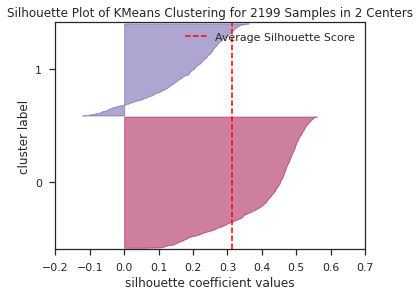

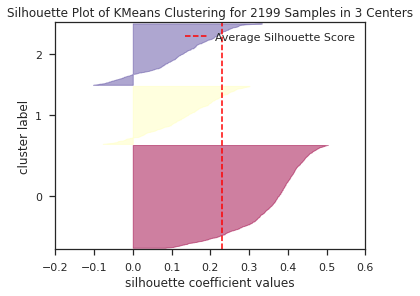

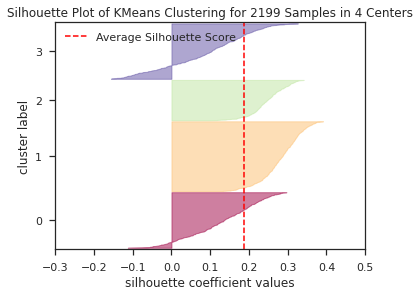

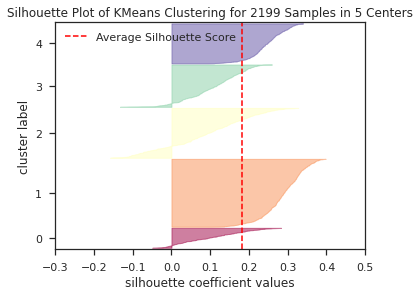

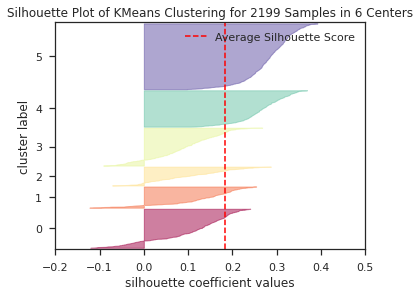

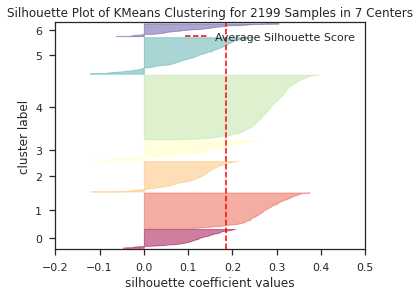

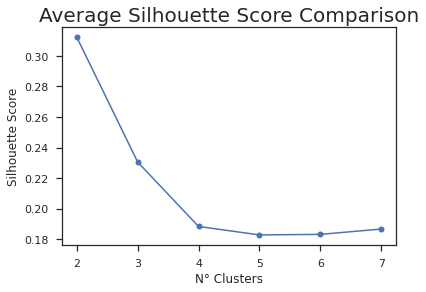

In [29]:
k_scores=[]
for k in range(2,8):
  kmeans = KMeans(n_clusters=k,random_state=42)
  y_pred = kmeans.fit_predict(customer_data_reduced_scaled)
  k_score = silhouette_score(customer_data_reduced_scaled, kmeans.labels_)
  k_scores.append(k_score)
  silhouette_visualizer(kmeans,customer_data_reduced_scaled, colors='Spectral',size=(400, 300))
  
  
#the silhouette_scores
plt.plot(range(2,8),k_scores,marker='o')
plt.ylabel("Silhouette Score")
plt.xlabel("N° Clusters")
plt.title("Average Silhouette Score Comparison", fontsize=20)
plt.show()

Here we have two graph types to help choosing the best number of clusters. First we have the *Silhouette Plot*, wich shows the score for each instance divided by clusters. Each 'blade' is a cluster and what is desired is that scores are higher as possible. Also we have an horizontal dashed line representing the mean of all scores. 

We can see from the plots that there is always a cluster with almost all instances with scores higher than the mean, and the majority of the other groups with the values being lower than the mean. Since the average Silhouette Score differs a lot for each case, the last plot clarifies how it changes through the experiments. We can see that the average score decreases quickly from 2 to 4, and then becomes almost stable. A recomendation is to use the second higher average silhouette score. Given this, we'll use the number of clusters as **3**.

In [30]:
kmeans = KMeans(n_clusters=3,random_state=42)
y_pred = kmeans.fit_predict(customer_data_reduced_scaled)

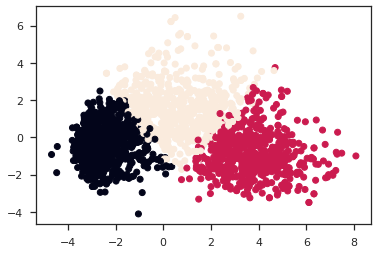

In [45]:
_ = plt.scatter(customer_data_reduced_scaled['PCA_1'],customer_data_reduced_scaled['PCA_2'],c=y_pred)

## Clusters Visualization and Naming

Now we'll observe how the segments were divided, see their characteristics and name them.

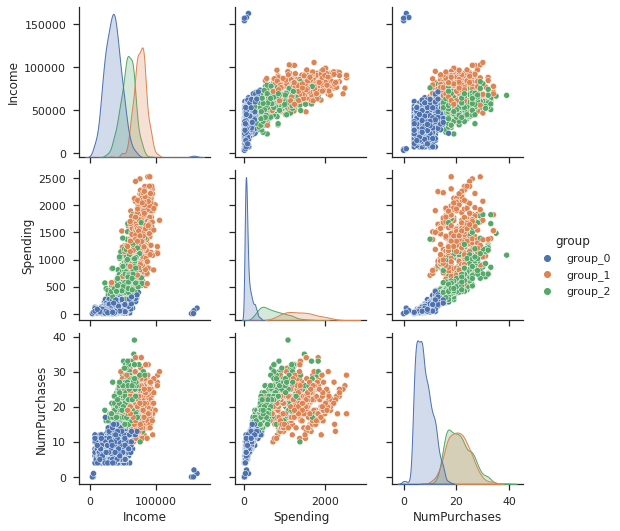

In [32]:
y_str = ['group_'+str(y) for y in y_pred]
customer_data_w_pred = customer_data#[['Income','Spending','NumPurchases']]
customer_data_w_pred['group'] = y_str
_ = sns.pairplot(customer_data_w_pred[['Income','Spending','NumPurchases','group']],hue='group',hue_order=['group_0','group_1','group_2'])

The group in blue, in contrast to the other groups, presents lower number of purchases, being this the most distinguish feature. Both orange and green have very similar income and number of purchases, but different spending values. With these conclusions, we can create the following naming:

| Group 	|         Name        	|
|:-----:	|:-------------------:	|
|   0   	| Occasional Customers 	|
|   1   	| Major Spender       	|
|   2   	| Moderate Spender    	|

In [33]:
customer_data_w_pred.replace({'group_0':'Occasional Customer','group_1':'Major Spender', 'group_2':'Moderate Spender'},inplace=True)

# Customer Segment Analysis

Now that we have the segments, we can present data analysis per customer segment.


## Demographic Features

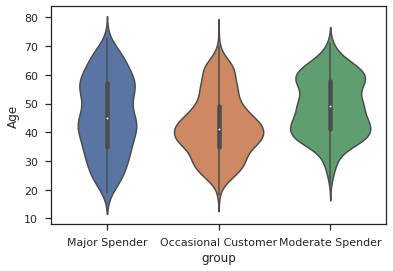

In [34]:
_ = sns.violinplot(data=customer_data_w_pred,y='Age',x='group')

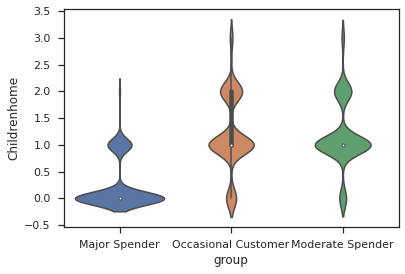

In [35]:
_ = sns.violinplot(data=customer_data_w_pred,y='Childrenhome',x='group')

The age plot does not show big differences  between the categories. The number of children, however, indicates that the major spenders are the ones who have less kids at home. Let's see if this holds.

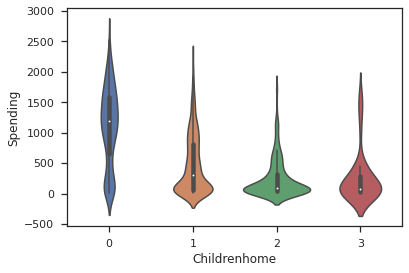

In [36]:
_ =sns.violinplot(data=customer_data_w_pred, x="Childrenhome", y="Spending")

Indeed, the higher spenders are the ones with no children.

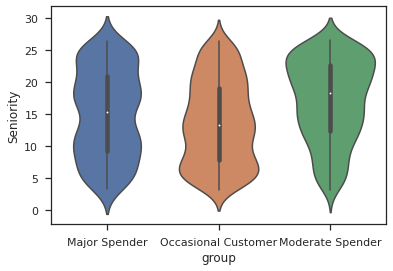

In [37]:
_ = sns.violinplot(data=customer_data_w_pred,y='Seniority',x='group')

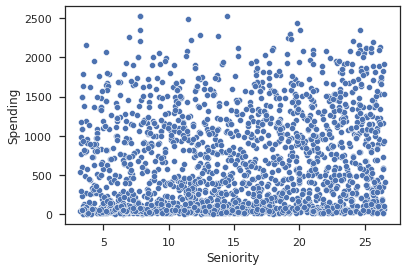

In [38]:
_ = sns.scatterplot(data=customer_data_w_pred,y='Spending',x='Seniority')

The importance of this graph is to evaluate if the higher spenders are the ones with higher seniority. The violin plots shows that the mean of the *Moderate Spenders* is higher than the others. The mean of the two other segments is almost the same, showing that there is not a direct relation between seniority and spends. The scatterplot of bothe variables also shows this. The data is disperse indicating no clear relationship. Also, high spending values are common for both high and low seniority levels.


## Product Analysis

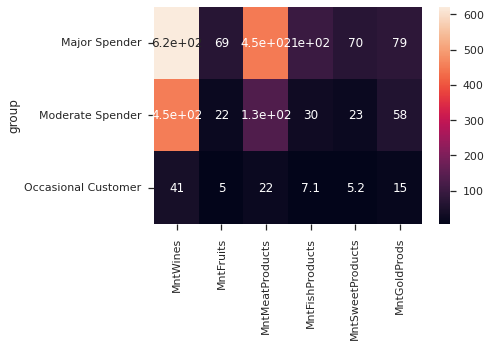

In [39]:
filter_products_col_w_pred = filter_products_col +['group']
prod_spend_mean = customer_data_w_pred[filter_products_col_w_pred].groupby('group').mean()
filter_products_col_w_pred = filter_products_col + ['group']
_ = sns.heatmap(prod_spend_mean,annot=True)


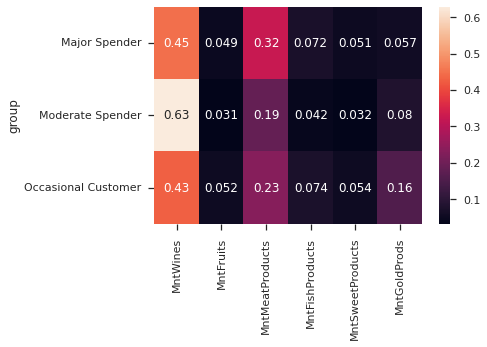

In [40]:
prod_spend_total = prod_spend_mean.sum(axis=1)
prod_spend_percentage = prod_spend_mean.divide(prod_spend_total,axis=0)
_ = sns.heatmap(prod_spend_percentage,annot=True)

The Heatmaps show that there is a clear difference beteween the ammount spended by each customer segment, and this can be observed in all categories. A second heatmap was plotted to evaluate how each category ditribute their spends.  Here we see a similar behavior: all segments spend more money in wine followed by meat. This is reasonable, since these tend to be expensive products.

## Place Analysis

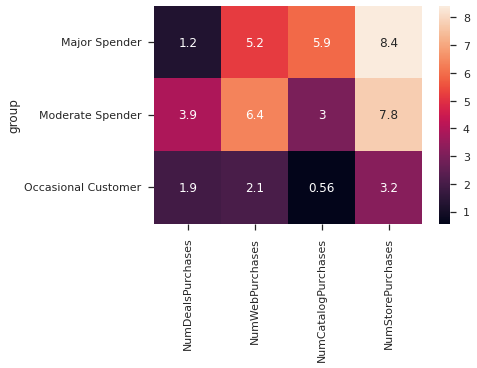

In [41]:
filter_place_n_purchases = [col for col in customer_data if col.endswith('Purchases')][:-1]
filter_place_n_purchases_w_pred = filter_place_n_purchases +['group']
place_n_purchases_mean = customer_data_w_pred[filter_place_n_purchases_w_pred].groupby('group').mean()
_ = sns.heatmap(place_n_purchases_mean,annot=True)

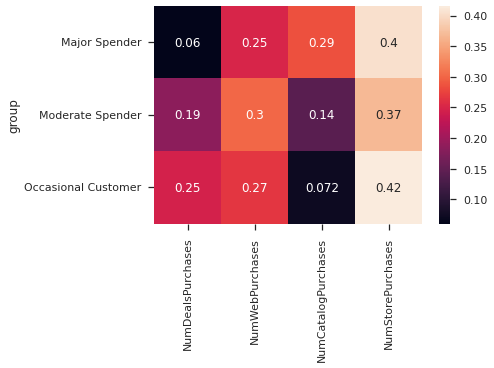

In [42]:
place_n_purchases_total = place_n_purchases_mean.sum(axis=1)
place_n_purchases_percentage = place_n_purchases_mean.divide(place_n_purchases_total,axis=0)
_ = sns.heatmap(place_n_purchases_percentage,annot=True)

Here we can see a difference. For all the segments, the preferable way to make purchases is going to the store. Nevertheless, when we see the second preferable way to buy, the answer is different. For the *Major Spender* group is the catalog, while for the *Moderate Spender* and the *Occasional Customer* the online shopping is a more frequent option. Thepercentage of online shopping is not that different for each case, but the catalog percentage is. 

# Conclusion

The analysis made a client segmentation dividing the original group in 3 clusters. It was possible to observe the differences and similarities of each segment. The major conlcusion was that the three groups can diverge in the amount of money spended, but the proportion of each product category is quite similar. The *Place Analysis*, on the other hand, showed that the groups have different behavior. This difference can be important to target especific marketing campaings to the desired customers.

# Bibliography

Grigsby, M. (2018). Marketing Analytics: A Practical Guide to Improving Consumer Insights Using Data Techniques. Kogan Page Publishers.